In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft
from scipy.signal import butter, lfilter, freqz, lfilter_zi

In [2]:
data = pd.read_csv("data.csv" , header = None)
data = data.transpose()
data = data.to_numpy()
data = data[0]
data.shape

(24320,)

In [3]:
t = np.arange(0,190,0.0078125)
t.shape

(24320,)

In [ ]:
fig = plt.figure(figsize=(16, 6))
plt.ylabel("Amplitude", fontsize=14)
plt.xlabel("Time(s)", fontsize=14)
plt.plot(t , data)
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 6))
plt.ylabel("Amplitude", fontsize=14)
plt.xlabel("Time(s)", fontsize=14)
plt.plot(t[:640] , data[:640])
plt.show()

In [7]:
n = len(data)
dt = 1.0/128.0

f_data = np.fft.fft(data,n)
PSD = f_data * np.conj(f_data) / n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype = int)
f_data

array([ 1.01777668e+08   +0.j        ,  1.01412294e+03-3224.26319681j,
        3.02932905e+03 -540.88390086j, ...,
       -7.74827182e+03+1997.56198243j,  3.02932905e+03 +540.88390086j,
        1.01412294e+03+3224.26319681j])

C:\Users\USER\miniconda3\envs\tf_gpu\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


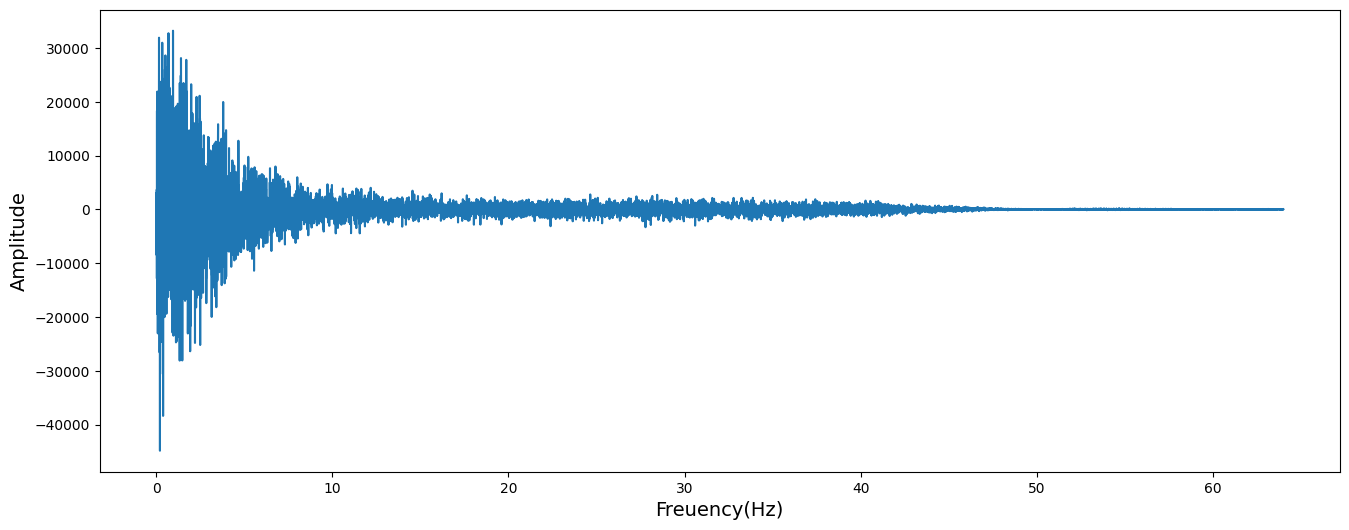

In [5]:
fig = plt.figure(figsize=(16, 6))
plt.plot(freq[L], f_data[L])
plt.ylabel("Amplitude", fontsize=14)
plt.xlabel("Freuency(Hz)", fontsize=14)
#plt.xlim(0,20)
plt.show()

C:\Users\USER\miniconda3\envs\tf_gpu\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


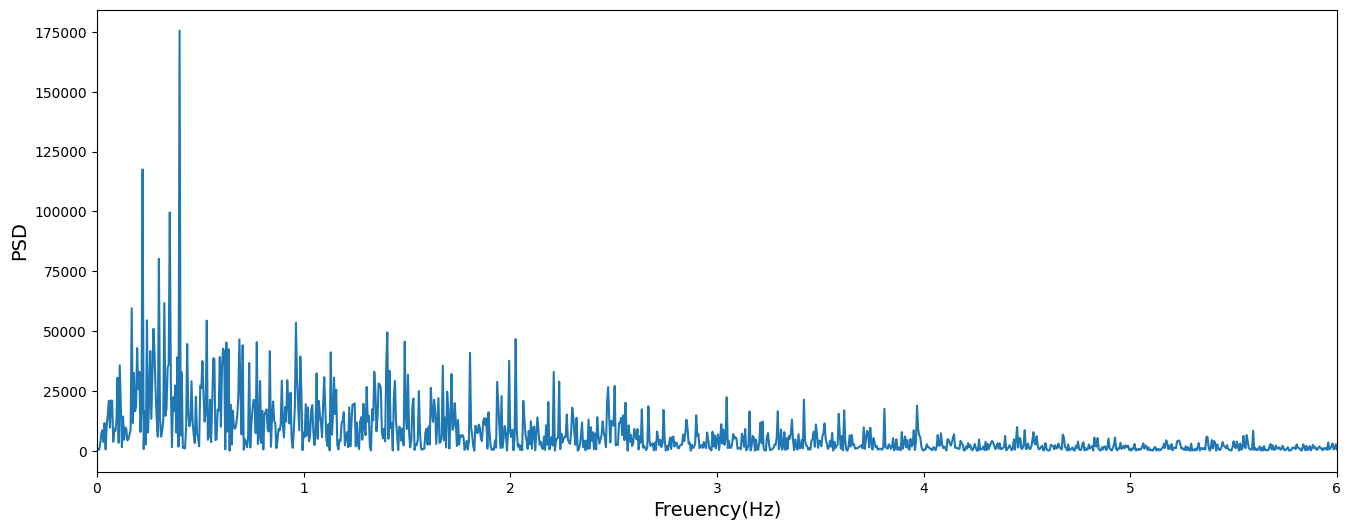

In [6]:
fig = plt.figure(figsize=(16, 6))
plt.plot(freq[L], PSD[L])
plt.ylabel("PSD", fontsize=14)
plt.xlabel("Freuency(Hz)", fontsize=14)
plt.xlim(0,6)
plt.show()

In [8]:
indices = PSD>1000
PSDclean = PSD * indices
fc_data = indices*f_data
cd = np.fft.ifft (fc_data)
cd

array([4180.87155893+1.57067342e-15j, 4181.67207602+4.18846244e-15j,
       4182.46272103+3.55271368e-15j, ..., 4178.58172982-4.81439933e-15j,
       4179.29533636-2.84720439e-15j, 4180.07032876-6.27439356e-15j])

C:\Users\USER\miniconda3\envs\tf_gpu\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


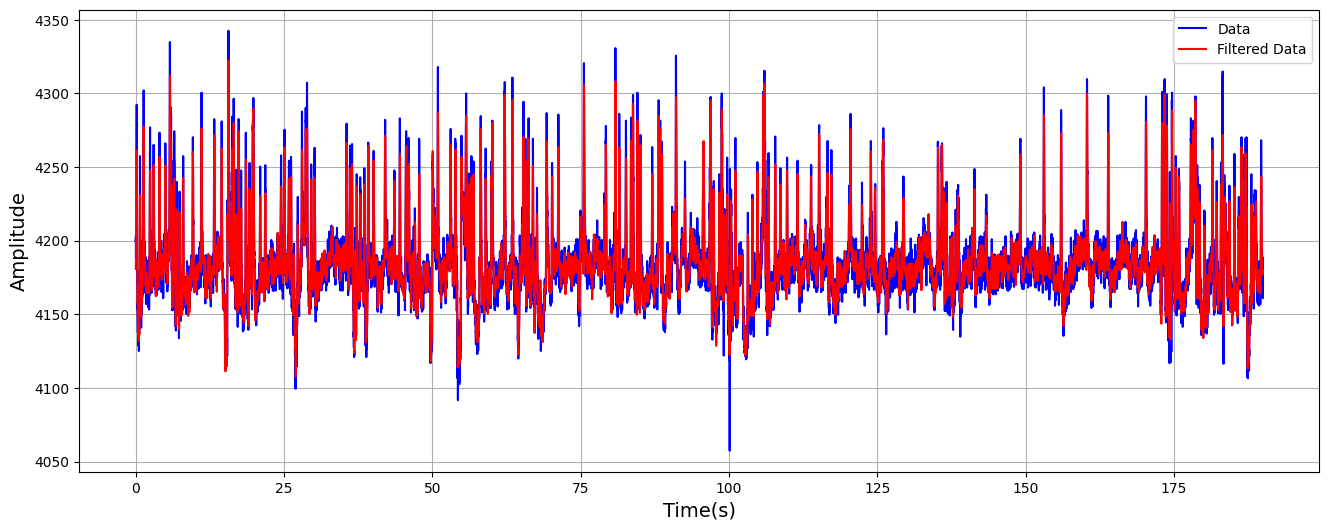

In [9]:
fig = plt.figure(figsize=(16, 6))
plt.ylabel("Amplitude", fontsize=14)
plt.xlabel("Time(s)", fontsize=14)
plt.plot(t, data, 'b-', label='Data')
plt.plot(t, cd, 'r-', label ="Filtered Data")
plt.grid()
plt.legend()
plt.show()

C:\Users\USER\miniconda3\envs\tf_gpu\lib\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


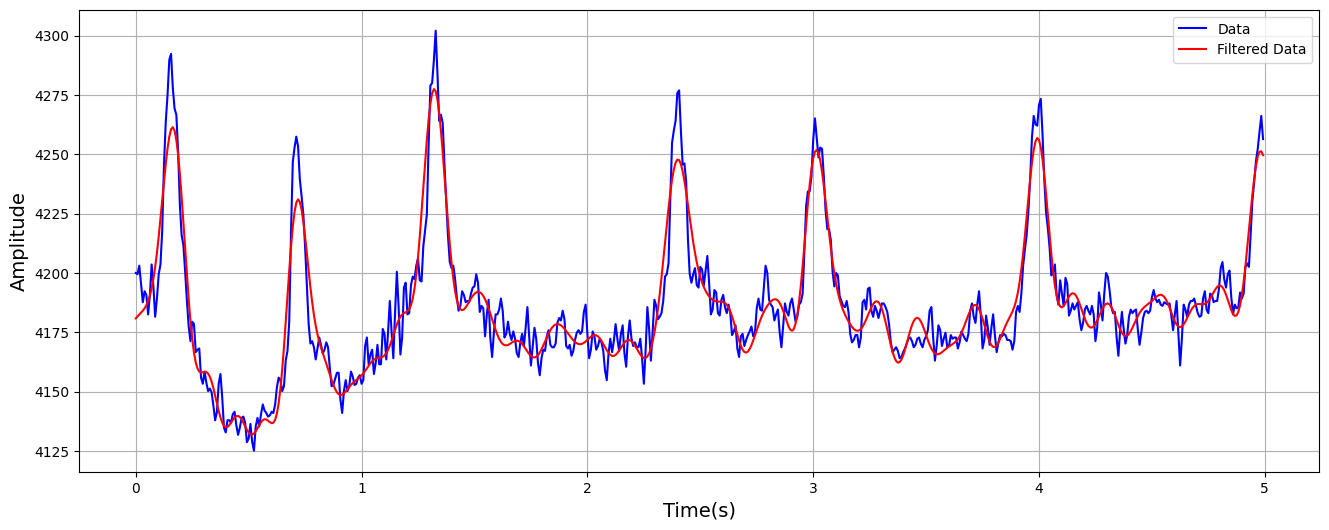

In [10]:
fig = plt.figure(figsize=(16, 6))
plt.ylabel("Amplitude", fontsize=14)
plt.xlabel("Time(s)", fontsize=14)
plt.plot(t[:640], data[:640], 'b-', label='Data')
plt.plot(t[:640], cd[:640], 'r-', label = "Filtered Data")
plt.grid()
plt.legend()
plt.show()

In [ ]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

# Setting standard filter requirements.
order = 6
fs = 128       
cutoff = 5  

b, a = butter_lowpass(cutoff, fs, order)

# Plotting the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0,20)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

In [ ]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    zi = lfilter_zi(b, a) * data[0]
    y,_ = lfilter(b, a, data, zi=zi)
    return y


fcd = butter_lowpass_filter(data, cutoff, fs, order)

fig = plt.figure(figsize=(16, 6))
plt.ylabel("Amplitude", fontsize=14)
plt.xlabel("Time(s)", fontsize=14)
plt.plot(t, data, 'b-', label='Data')
plt.plot(t, fcd, 'r-', linewidth=2, label='Filtered Data')
plt.grid()
plt.legend()
#plt.ylim(4100,4400)

plt.subplots_adjust(hspace=0.35)
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 6))
plt.ylabel("Amplitude", fontsize=14)
plt.xlabel("Time(s)", fontsize=14)
plt.plot(t[0:640], data[0:640], 'b-', label='Data')
plt.plot(t[0:640], fcd[0:640], 'r-', linewidth=2, label='Filtered Data')
plt.grid()
plt.legend()
#plt.ylim(4100,4400)

plt.subplots_adjust(hspace=0.35)
plt.show()

In [14]:
cd = np.real(cd)
np.save('cleaned_data.npy', cd)
cd

array([4180.87155893, 4181.67207602, 4182.46272103, ..., 4178.58172982,
       4179.29533636, 4180.07032876])